## CSCI 183 Data Science
### Spam Filtering for Short Messages: Word Clouds
#### Ryan Johnson, Grace Nguyen, and Raya Young




In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud

#### Import the test data 
Separate into two arrays: spam and ham. These arrays will be processed individually in order to generate word clouds.

In [3]:
data = pd.read_csv("training-data/spamcollectiondata.tsv", sep='\t', names = ["Category", "Message"])
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Sample of Spam messages

In [4]:
spam = data.loc[data['Category'] == 'spam']
spam.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


#### Sample of Ham messages

In [5]:
#df2 = pd.DataFrame({'Messages': ham})
ham = data.loc[data['Category'] == 'ham']
ham.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


#### Converting to lowercase

In [6]:
spam = [word.lower() for word in spam['Message']]
ham = [word.lower() for word in ham['Message']]

#### Stopword removal and Stemming
Clean both sets of data by removing stopwords. This way, the word cloud will not be completely populated by common stop words. Stemming is also important to ensure eliminate the possibility of having multiple different forms of words.

Spam:

In [7]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
filtered = ""
clean_spam = ""
for message in spam:
    sentence = message.split(" ")
    for word in sentence:
        if word.lower() not in stop:
            stemmed = stemmer.stem(word)
            filtered = filtered + " " + stemmed
    clean_spam = clean_spam + " " + filtered
    filtered = ""

Ham:

In [8]:
clean_ham = ""
for message in ham:
    sentence = message.split(" ")
    for word in sentence:
        if word.lower() not in stop:
            stemmed = stemmer.stem(word)
            filtered = filtered + " " + stemmed
    clean_ham = clean_ham + " " + filtered
    filtered = ""

#### Creating Word Cloud
Spam:

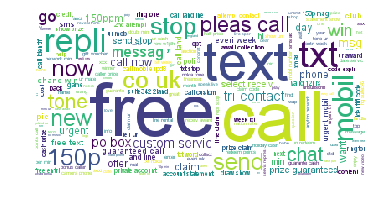

In [9]:
wordcloud = WordCloud(font_path='/Library/Fonts/Arial.ttf',
                      relative_scaling = 1.0,
                      background_color = "white",
                      ).generate(clean_spam)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ham:

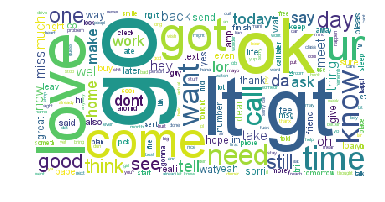

In [10]:
wordcloud = WordCloud(font_path='/Library/Fonts/Arial.ttf',
                      relative_scaling = 1.0,
                      background_color = "white",
                      ).generate(clean_ham)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()